In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

url = "https://raw.githubusercontent.com/TesseractExW/drinking-water-ml-test/main/Drinking_water.csv"


In [253]:
data_frame = pd.read_csv(url,header = 0,sep=',',on_bad_lines = 'skip')
data_frame.drop(data_frame.columns[[0,-2,-1]],axis=1,inplace=True)

In [254]:
# data_frame['mean_feature'] = data_frame.mean(axis=1)
# data_frame['std_feature'] = data_frame.std(axis=1)
# def swap_columns(df, col1, col2):
#     col_list = list(df.columns)
#     x, y = col_list.index(col1), col_list.index(col2)
#     col_list[y], col_list[x] = col_list[x], col_list[y]
#     df = df[col_list]
#     return df
# data_frame = swap_columns(data_frame,'std_feature','Potability')

In [255]:
data_frame.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<Axes: >

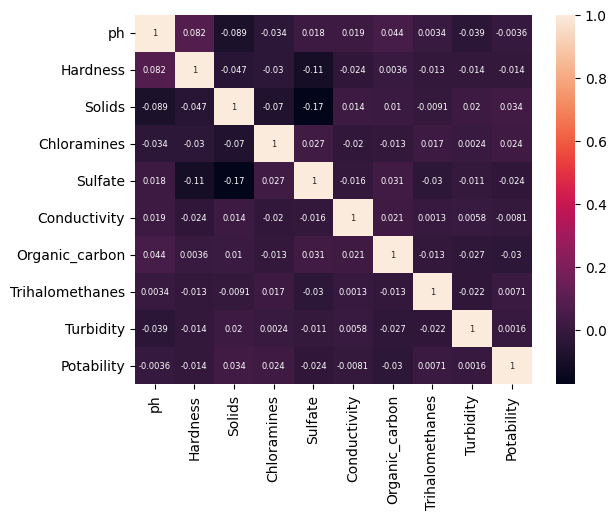

In [256]:
sns.heatmap(data_frame.corr(),annot=True,annot_kws={"size": 6})

In [257]:
# from sklearn.utils import resample

# minority_class = data_frame[data_frame['Potability'] == 1]
# majority_class = data_frame[data_frame['Potability'] == 0]

# majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=21)

# data_frame = pd.concat([minority_class, majority_downsampled])

# sns.pairplot(df,hue=9,plot_kws=dict(alpha=0.2))

In [ ]:
imputer = SimpleImputer(strategy='mean')

x_features = data_frame.iloc[:,:-1].values
y_potability = data_frame.iloc[:,-1].values

x_features = imputer.fit_transform(x_features)
y_binary = np.where(y_potability > np.median(y_potability), 1, 0)
x_train , x_test , y_train , y_test = train_test_split(x_features,y_binary,test_size=0.2,random_state=42)

In [259]:
from sklearn.preprocessing import StandardScaler , RobustScaler


scaler0 = StandardScaler().fit(x_train)

In [260]:
from sklearn.decomposition import PCA
x_train = scaler0.transform(x_train)
x_test = scaler0.transform(x_test)
scaler1 = RobustScaler()
x_train = scaler1.fit_transform(x_train)
x_test = scaler1.transform(x_test)

pca = PCA();

In [261]:
x_train.shape

(2620, 2)

In [262]:
cls = SVC()
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)

cf_matrix0 = confusion_matrix(y_train,cls.predict(x_train))
cf_matrix1 = confusion_matrix(y_test,y_pred) 

<Axes: >

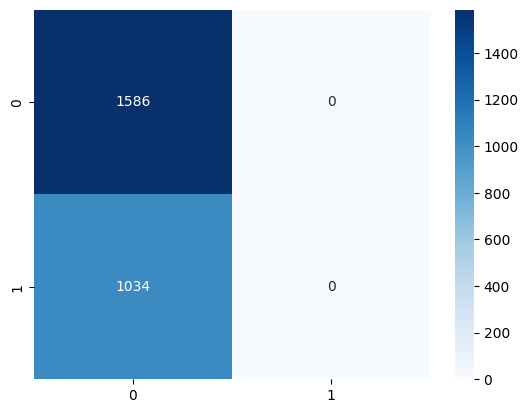

In [263]:
sns.heatmap(cf_matrix0, annot=True, cmap='Blues',fmt='g')

<Axes: >

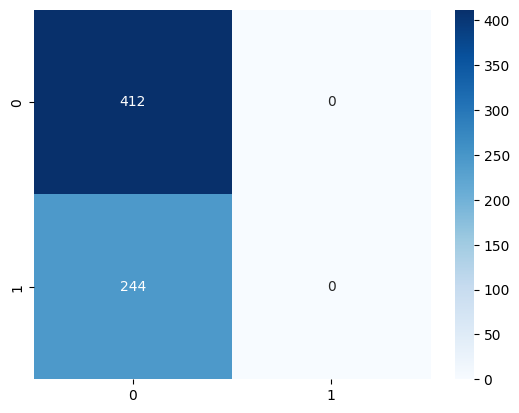

In [264]:
sns.heatmap(cf_matrix1, annot=True, cmap='Blues',fmt='g')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,cls.predict(x_train))

0.6053435114503817

In [244]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,cls.predict(x_test))

0.6280487804878049